In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Load Sample Data, Display #

In [2]:
data = np.load('data/landfill_clear_plastic.npz')
landfill = data['arr_0']
clear = data['arr_1']
plastic = data['arr_2']

In [3]:
plastic[np.isnan(plastic)] = 0

(148, 212, 224)


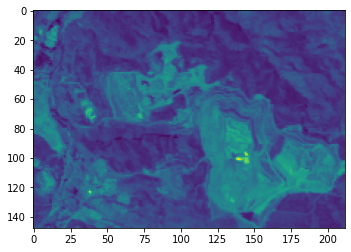

In [4]:
plt.imshow(landfill[:, :, 30])
print(landfill.shape)

(148, 212, 224)


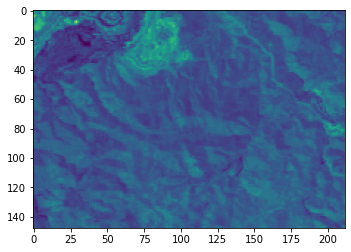

In [5]:
plt.imshow(clear[:, :, 30])
print(clear.shape)

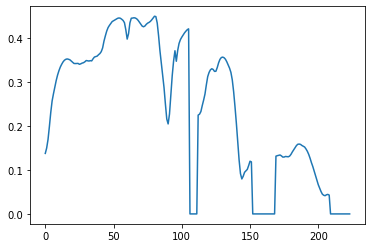

In [6]:
plt.plot(plastic)

# Whitening (Sphering) #

In [7]:
def whitening_matrix(m):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    mean = np.mean(m, axis=0)
    cov = np.cov(m - mean, rowvar=False)
    w, v = np.linalg.eig(cov)
    W = np.matmul(np.matmul(v, np.diag(1 / np.sqrt(1e-6 + w))), v.T)
    return W, mean

def whiten(m, W, mean):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    m = m - mean
    m = np.matmul(m, W)
    m = m.reshape(*old_shape)
    return m

In [8]:
W, mean = whitening_matrix(clear)

In [9]:
landfill2 = whiten(landfill, W, mean)
clear2 = whiten(clear, W, mean)
plastic2 = whiten(plastic, W, mean)

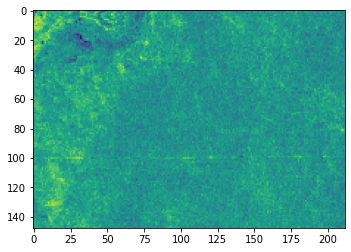

In [10]:
plt.imshow(clear2[:, :, 30])

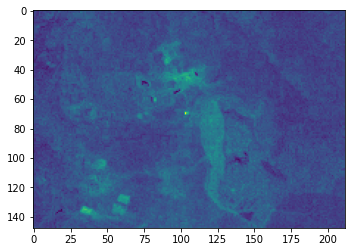

In [11]:
plt.imshow(landfill2[:, :, 30])

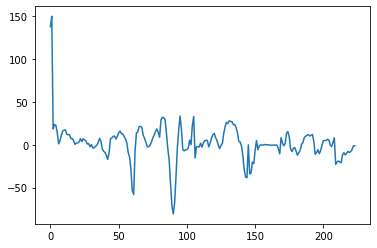

In [12]:
plt.plot(plastic2)

# Matching Filter (Correlation) #

In [13]:
def score(area, spectrum):
    old_shape = area.shape
    area = area.reshape(-1, old_shape[-1])
    area = np.matmul(area, spectrum)
    area = area.reshape(*old_shape[0:2])
    return area

## Correlation in Whitened Space ##

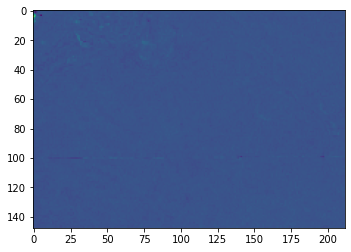

In [14]:
clear3 = score(clear2, plastic2)
plt.imshow(clear3)

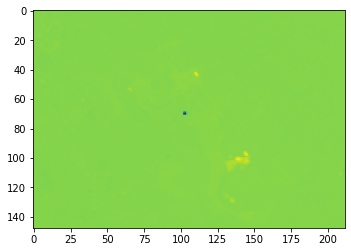

In [15]:
landfill3 = score(landfill2, plastic2)
plt.imshow(landfill3)

(array([[  0.,   0., 141., ...,   1.,   0.,   1.],
        [  2.,   0., 143., ...,   0.,   0.,   0.],
        [  0.,   2., 146., ...,   0.,   0.,   0.],
        ...,
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.],
        [  0.,   0., 148., ...,   0.,   0.,   0.]]),
 array([-4293.03172979, -2617.50606959,  -941.98040938,   733.54525082,
         2409.07091102,  4084.59657122,  5760.12223142,  7435.64789162,
         9111.17355182, 10786.69921203, 12462.22487223]),
 <a list of 212 BarContainer objects>)

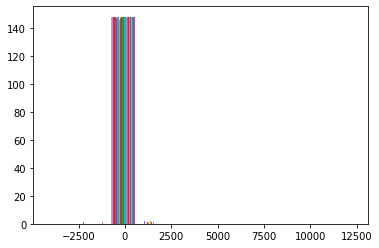

In [16]:
plt.hist(clear3)

(array([[  0.,   0.,   0., ...,   1., 147.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        ...,
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.],
        [  0.,   0.,   0., ...,   0., 148.,   0.]]),
 array([-68651.85673826, -60246.29806397, -51840.73938969, -43435.18071541,
        -35029.62204112, -26624.06336684, -18218.50469256,  -9812.94601827,
         -1407.38734399,   6998.17133029,  15403.73000458]),
 <a list of 212 BarContainer objects>)

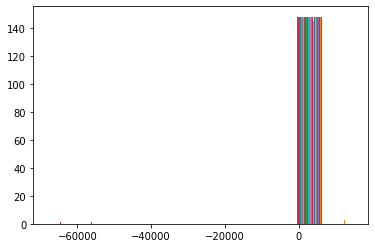

In [17]:
plt.hist(landfill3)

In [18]:
clear4 = np.clip(clear3, 0, 15.5e3)
landfill4 = np.clip(landfill3, 0, 15.5e3)

This is can be done with a [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function).

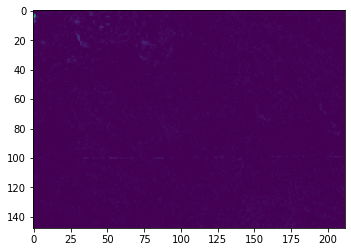

In [19]:
plt.imshow(clear4)

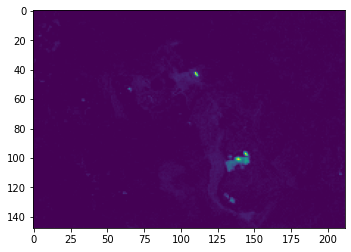

In [20]:
plt.imshow(landfill4)

(array([[141.,   0.,   4., ...,   0.,   0.,   1.],
        [145.,   0.,   2., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([    0.        ,  1246.22248722,  2492.44497445,  3738.66746167,
         4984.88994889,  6231.11243611,  7477.33492334,  8723.55741056,
         9969.77989778, 11216.002385  , 12462.22487223]),
 <a list of 212 BarContainer objects>)

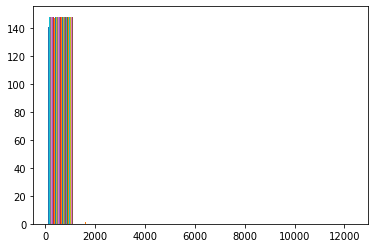

In [21]:
plt.hist(clear4)

(array([[148.,   0.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [147.,   1.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.],
        [148.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([    0.        ,  1540.37300046,  3080.74600092,  4621.11900137,
         6161.49200183,  7701.86500229,  9242.23800275, 10782.6110032 ,
        12322.98400366, 13863.35700412, 15403.73000458]),
 <a list of 212 BarContainer objects>)

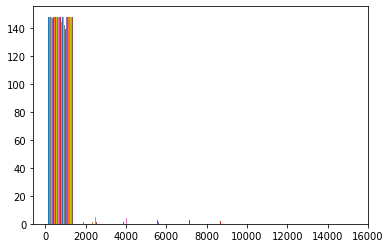

In [22]:
plt.hist(landfill4)

## Control: Correlation in Native Space ##

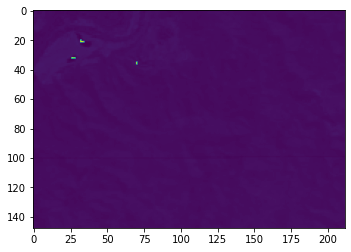

In [23]:
plt.imshow(score(clear, plastic))

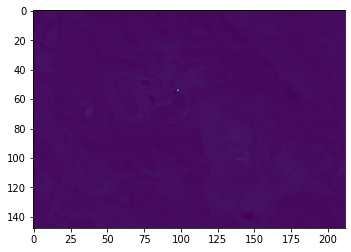

In [24]:
plt.imshow(score(landfill, plastic))

# Band Selection #

(array([  4.,   5.,  20., 145.,  48.,   0.,   0.,   0.,   0.,   2.]),
 array([-80.69242274, -57.62065278, -34.54888282, -11.47711285,
         11.59465711,  34.66642707,  57.73819703,  80.809967  ,
        103.88173696, 126.95350692, 150.02527689]),
 <BarContainer object of 10 artists>)

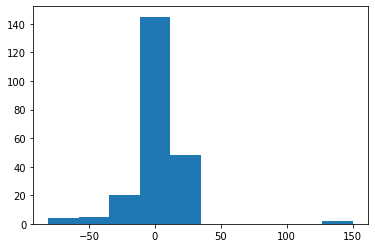

In [25]:
plt.hist(plastic2)

In [26]:
(plastic2 > 20).sum()

23

In [27]:
plastic3 = plastic2 * (plastic2 > 20)
landfill42 = score(landfill2, plastic3)
clear42 = score(clear2, plastic3)

-1445.865952549384 2307.3103572529953


(array([[0., 0., 0., ..., 1., 0., 1.],
        [2., 0., 1., ..., 0., 0., 0.],
        [0., 0., 2., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1445.86595255, -1070.54832157,  -695.23069059,  -319.91305961,
           55.40457137,   430.72220235,   806.03983333,  1181.35746431,
         1556.67509529,  1931.99272627,  2307.31035725]),
 <a list of 212 BarContainer objects>)

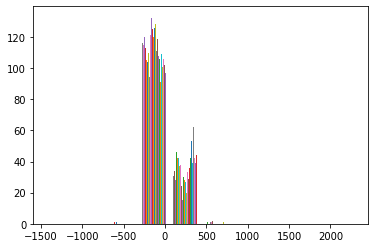

In [28]:
print(np.min(clear42), np.max(clear42))
plt.hist(clear42)

-785.0986589646589 6096.611680595823


(array([[ 86.,  62.,   0., ...,   0.,   0.,   0.],
        [ 97.,  51.,   0., ...,   0.,   0.,   0.],
        [ 89.,  59.,   0., ...,   0.,   0.,   0.],
        ...,
        [  3., 145.,   0., ...,   0.,   0.,   0.],
        [  7., 141.,   0., ...,   0.,   0.,   0.],
        [ 10., 138.,   0., ...,   0.,   0.,   0.]]),
 array([-785.09865896,  -96.92762501,  591.24340895, 1279.4144429 ,
        1967.58547686, 2655.75651082, 3343.92754477, 4032.09857873,
        4720.26961268, 5408.44064664, 6096.6116806 ]),
 <a list of 212 BarContainer objects>)

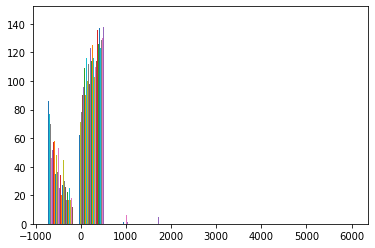

In [29]:
print(np.min(landfill42), np.max(landfill42))
plt.hist(landfill42)

In [30]:
clear107 = np.clip(clear42, -1e3, 1e3)
landfill107 = np.clip(landfill42, -1e3, 1e3)

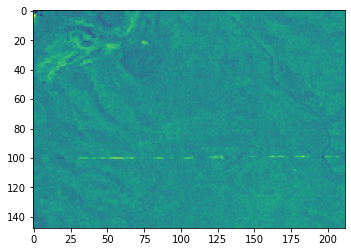

In [31]:
plt.imshow(clear107)

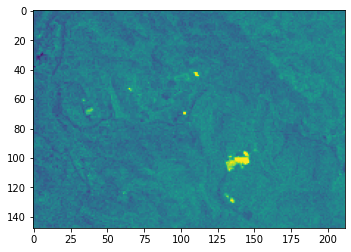

In [32]:
plt.imshow(landfill107)

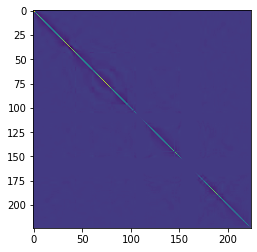

In [33]:
plt.imshow(W)

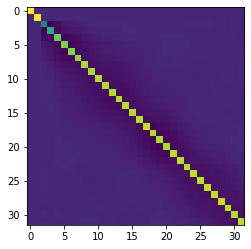

In [34]:
plt.imshow(W[:32,:32])

In [35]:
def whiten2(m, W, mean):
    old_shape = m.shape
    m = m.reshape(-1, old_shape[-1])
    m = m - mean
    m = np.multiply(m, (np.abs(plastic2) > 8))
    m = np.matmul(m, W)
    m = m.reshape(*old_shape)
    return m

In [36]:
clear5 = score(whiten2(clear, W, mean * (plastic2 > 20)), plastic2)
landfill5 = score(whiten2(landfill, W, mean * (plastic2 > 20)), plastic2)

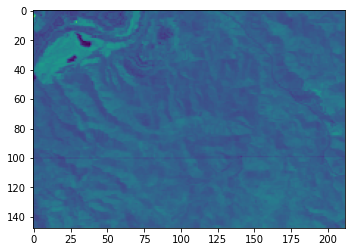

In [37]:
plt.imshow(clear5)

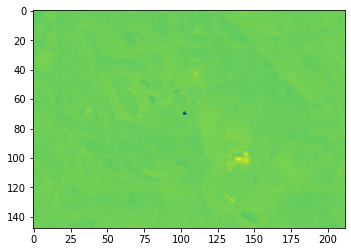

In [38]:
plt.imshow(landfill5)

(array([[ 4.,  3., 81., ...,  1.,  0.,  1.],
        [ 2.,  3., 90., ...,  0.,  0.,  0.],
        [ 0.,  5., 78., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 43., ...,  0.,  0.,  0.],
        [ 0.,  0., 41., ...,  0.,  0.,  0.],
        [ 0.,  0., 43., ...,  0.,  0.,  0.]]),
 array([-64971.99242824, -61253.46521453, -57534.93800083, -53816.41078712,
        -50097.88357342, -46379.35635971, -42660.82914601, -38942.3019323 ,
        -35223.7747186 , -31505.24750489, -27786.72029118]),
 <a list of 212 BarContainer objects>)

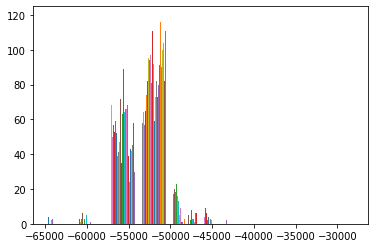

In [39]:
plt.hist(clear5)

(array([[  0.,   0.,   0., ..., 148.,   0.,   0.],
        [  0.,   0.,   0., ..., 147.,   1.,   0.],
        [  0.,   0.,   0., ..., 148.,   0.,   0.],
        ...,
        [  0.,   0.,   0., ..., 145.,   3.,   0.],
        [  0.,   0.,   0., ..., 148.,   0.,   0.],
        [  0.,   0.,   0., ..., 146.,   2.,   0.]]),
 array([-197574.57161955, -178970.25859471, -160365.94556987,
        -141761.63254504, -123157.3195202 , -104553.00649536,
         -85948.69347053,  -67344.38044569,  -48740.06742085,
         -30135.75439601,  -11531.44137118]),
 <a list of 212 BarContainer objects>)

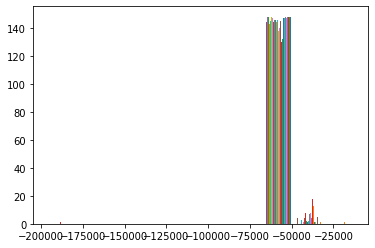

In [40]:
plt.hist(landfill5)

In [42]:
clear6 = np.clip(clear5, -7.5e4, 0)
landfill6 = np.clip(landfill5, -7.5e4, 0)

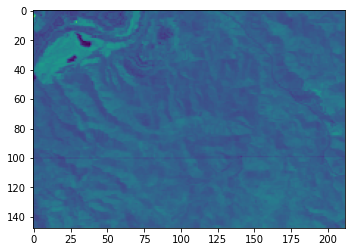

In [43]:
plt.imshow(clear6)

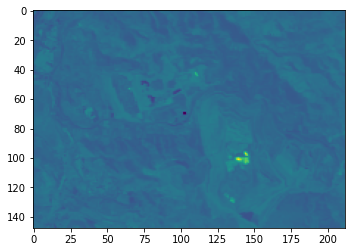

In [44]:
plt.imshow(landfill6)